# Covid-19

Ajuste exponencial com dados do G1.
fonte dos dados link: https://g1.globo.com/bemestar/coronavirus/noticia/2020/03/20/brasil-tem-904-casos-confirmados-de-novo-coronavirus-diz-ministerio.ghtml


In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy as sp
from scipy.optimize import least_squares

## Modelo da taxa de infecção:

\begin{align}
\frac{dx}{dt} = a*x
\end{align}

\begin{align}
 x = C*e^{at}
\end{align}

x é o numero de infecções

In [2]:
def modelo_exponencial_sol(par,t):
    x = par[1]*np.exp(par[0]*t)
    return x

def func_sol(par,t,y):
    """function to minimize"""
    x = modelo_exponencial_sol(par,t)
    return (x-y)**2
days = np.arange(1,6)
cases = np.array([234,291,428,621,904])
x0 = np.array([1., 150.])
t_train = days
y_train = cases
#res_robust = least_squares(caos_sol_minimize, x0, loss='soft_l1', f_scale=0.1, args=(t_train, y_train))
res_robust  = least_squares(func_sol, x0, args=(t_train, y_train))

### Avaliação visual do modelo

Text(0.5, 0, 'dias apartir do primeiro caso')

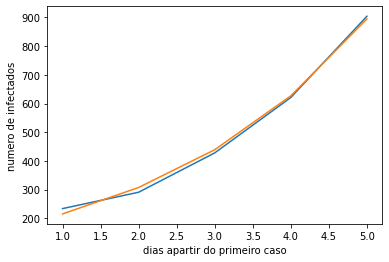

In [3]:
par = res_robust.x
plt.plot(days, cases)
days_forecast = np.arange(1,6)
plt.plot(days_forecast,modelo_exponencial_sol(par,days_forecast))
plt.ylabel("numero de infectados")
plt.xlabel("dias apartir do primeiro caso")

In [20]:
print("parametro a")
print(res_robust.x[0])
print("parametro C")
print(res_robust.x[1])

parametro a
0.3559129859246293
parametro C
150.93623962514687


## Forecast de 10 dias

Text(0.5, 0, 'dias apartir do primeiro caso')

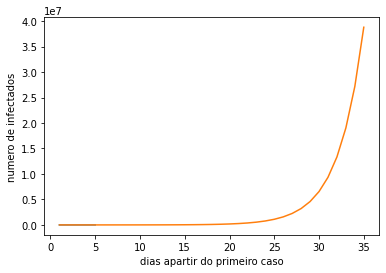

In [22]:
par = res_robust.x
plt.plot(days, cases)
days_forecast = np.arange(1,6+30)
plt.plot(days_forecast,modelo_exponencial_sol(par,days_forecast))
plt.ylabel("numero de infectados")
plt.xlabel("dias apartir do primeiro caso")

### Modelo de infecção levando em conta cura mas nao mortes

\begin{align}
\frac{dx}{dt} = a*x*(x-b)
\end{align}

\begin{align}
x = \frac{A}{B-e^{at}}
\end{align}

x é o numero de infecções

In [26]:
def modelo_infect_cure_sol(par,t):
    x = par[1]/(np.exp(par[0]*t)+par[2])
    return x

def modelo_infect_cure_sol_minimize(par,t,y):
    """function to minimize"""
    x = par[1]/(np.exp(par[0]*t)+par[2])
    return (x-y)**2
days = np.arange(1,6)
cases = np.array([234,291,428,621,904])
x0 = np.array([1., 150.])
t_train = days
y_train = cases
#res_robust = least_squares(caos_sol_minimize, x0, loss='soft_l1', f_scale=0.1, args=(t_train, y_train))
res_robust  = least_squares(caos_sol_minimize, x0, args=(t_train, y_train))

Text(0.5, 0, 'dias apartir do primeiro caso')

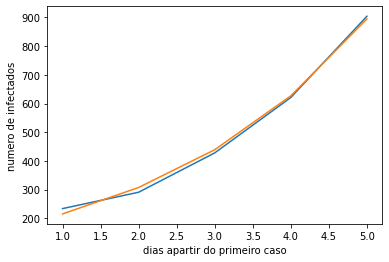

In [27]:
par = res_robust.x
plt.plot(days, cases)
days_forecast = np.arange(1,6)
plt.plot(days_forecast,modelo_exponencial_sol(par,days_forecast))
plt.ylabel("numero de infectados")
plt.xlabel("dias apartir do primeiro caso")

In [28]:
print("parametro a")
print(res_robust.x)
print("parametro C")
print(res_robust.x[1])

parametro a
[  0.35591299 150.93623963]
parametro C
150.93623962514687


fonte dos dados
link:
https://g1.globo.com/bemestar/coronavirus/noticia/2020/03/20/brasil-tem-904-casos-confirmados-de-novo-coronavirus-diz-ministerio.ghtml